# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Obtain Data

In [2]:
df = pd.read_csv('Data/400m_Hurdles_WR_Progression.csv')
print('df shape: ', df.shape)
df.head()

df shape:  (23, 7)


,Mark,Wind,Competitor,DOB,Country,Venue,Date
0,45.94,NaN,Karsten WARHOLM,28 FEB 1996,NOR,"Olympic Stadium, Tokyo (JPN)",03 AUG 2021
1,46.70,NaN,Karsten WARHOLM,28 FEB 1996,NOR,"Bislett Stadion, Oslo (NOR)",01 JUL 2021
2,46.78,NaN,Kevin YOUNG,16 SEP 1966,USA,"Estadio Olímpico, Barcelona (ESP)",06 AUG 1992
3,47.02,NaN,Edwin MOSES,31 AUG 1955,USA,Koblenz (GER),31 AUG 1983
4,47.13,NaN,Edwin MOSES,31 AUG 1955,USA,Milano (ITA),03 JUL 1980


# Scrub Data

Confirm what scrubbing needed with df.info()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Mark        23 non-null     object 
 1   Wind        0 non-null      float64
 2   Competitor  23 non-null     object 
 3   DOB         23 non-null     object 
 4   Country     23 non-null     object 
 5   Venue       23 non-null     object 
 6   Date        23 non-null     object 
dtypes: float64(1), object(6)
memory usage: 1.4+ KB


Drop columns not useful for modeling

In [4]:
df.drop(columns=['Wind', 'Competitor', 'DOB', 'Country', 'Venue'], inplace=True)
df.head()

,Mark,Date
0,45.94,03 AUG 2021
1,46.70,01 JUL 2021
2,46.78,06 AUG 1992
3,47.02,31 AUG 1983
4,47.13,03 JUL 1980


Update Mark data type to float

In [5]:
df['Mark'] = df['Mark'].apply(lambda x: x.replace('h', '').replace(' y', ''))
df = df.astype({'Mark': float})
df.head()

,Mark,Date
0,45.94,03 AUG 2021
1,46.70,01 JUL 2021
2,46.78,06 AUG 1992
3,47.02,31 AUG 1983
4,47.13,03 JUL 1980


Update Date data type to datetime and fill in missing dates

In [6]:
df = df.astype({'Date': 'datetime64[D]'})
df.sort_values(by='Date', inplace=True)
dates_df = pd.DataFrame(pd.date_range(start=df.Date.min(), end=df.Date.max()), columns=['Date'])
df = pd.merge(dates_df, df, how='outer', on='Date')
df.fillna(method='ffill', inplace=True)
df.head(5)

,Date,Mark
0,1908-07-22,55.0
1,1908-07-23,55.0
2,1908-07-24,55.0
3,1908-07-25,55.0
4,1908-07-26,55.0


Confirm data now scrubbed with df.info)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41286 entries, 0 to 41285
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    41286 non-null  datetime64[ns]
 1   Mark    41286 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 967.6 KB


# Explore Data

Calculate descriptive statistics for the time series dataset

In [8]:
df['Mark'].describe()

count    41286.000000
mean        49.561759
std          2.816191
min         45.940000
25%         46.780000
50%         49.100000
75%         50.600000
max         55.000000
Name: Mark, dtype: float64

Plot the 400m hurdles world record dataset

Text(0.5, 1.0, '400m Hurdles World Record By Day')

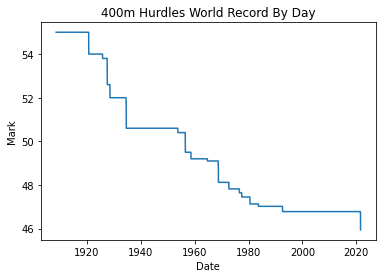

In [9]:
fig, ax = plt.subplots()
sns.lineplot(x='Date', y='Mark', data=df, ax=ax)
ax.set_title('400m Hurdles World Record By Day')

Plot the annual trend in the 400m hurdles wr

Text(0.5, 1.0, '400m Hurdles World Record By Year')

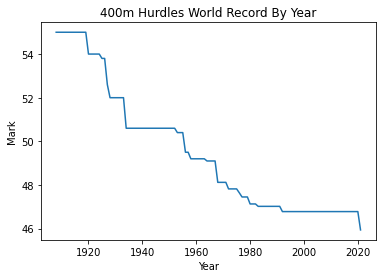

In [10]:
annual_df = df.copy()
annual_df['Year'] = pd.DatetimeIndex(df['Date']).year
annual_df = annual_df.groupby('Year').min()
annual_df.reset_index(inplace=True)
annual_df.drop(columns=['Date'], inplace=True)
annual_df.head()

fig, ax = plt.subplots()
sns.lineplot(x='Year', y='Mark', data=annual_df, ax=ax)
ax.set_title('400m Hurdles World Record By Year')

Plot the decadel trend in the 400m hurdles wr

Text(0.5, 1.0, '400m Hurdles World Record By Decade')

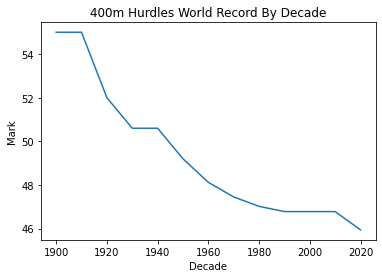

In [11]:
decadal_df = annual_df.copy()
decadal_df['Decade'] = decadal_df['Year'].apply(lambda x: int(str(x)[0:3] + '0'))
decadal_df = decadal_df.groupby('Decade').min()
decadal_df.drop(columns=['Year'], inplace=True)
decadal_df.reset_index(inplace=True)

fig, ax = plt.subplots()
sns.lineplot(x='Decade', y='Mark', data=decadal_df, ax=ax)
ax.set_title('400m Hurdles World Record By Decade')

# Model Data

In [13]:
annual_df

,Year,Mark
0,1908,55.00
1,1909,55.00
2,1910,55.00
3,1911,55.00
4,1912,55.00
...,...,...
109,2017,46.78
110,2018,46.78
111,2019,46.78
112,2020,46.78


In [14]:
decadal_df

,Decade,Mark
0,1900,55.00
1,1910,55.00
2,1920,52.00
3,1930,50.60
4,1940,50.60
5,1950,49.20
6,1960,48.12
7,1970,47.45
8,1980,47.02
9,1990,46.78
